Sampling Frequency: 48000 [Hz]
Sample Size: 2 [Byte]
Number of Channels: 1
Number of Samples: 153120


OSError: [Errno 30] Read-only file system: '/plot.png'

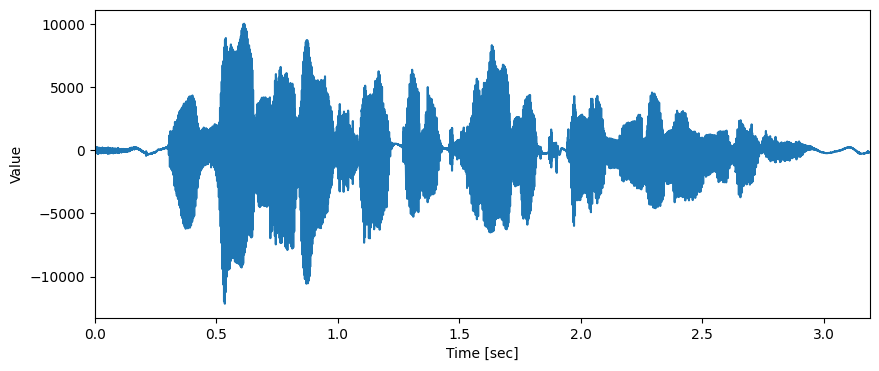

In [4]:
# plot_wave.py : 파일을 열어서 파형을 시각화한다.

# wav 데이터 읽기
import wave

# 수치 연산용
import numpy as np

# 시각화
import matplotlib.pyplot as plt

if __name__ == "__main__":
  # wav 파일 열기
  wav_file = 'Users/juyoung/speech_recognition/data/original/jsut_ver1.1/basic5000/wav/BASIC5000_0001.wav'
  # 파형을 출력하는 파일(png 파일)
  out_plot = './plot.png'

  # wav 파일을 열고 이후 처리를 진행
  with wave.open(wav_file) as wav:
  # 샘플링 주파수[Hz] 확인, 주파수는 전파나 음파가 1초 동안 진동하는 횟수, 해당 wav 파일은 1초동안 44100의 음압치를 기록한다
    sampling_frequency = wav.getframerate()
    # 샘플링 사이즈[Byte] 확인
    sampling_size = wav.getsampwidth()
    # 채널 수(마이크 수) 확인
    num_channels = wav.getnchannels()
    # wav 데이터 샘플 수 확인
    num_samples = wav.getnframes()
    # wav 데이터 읽기
    waveform = wav.readframes(num_samples)
    # 읽어들인 데이터는 바이너리 값(16bit integer)이므로 정수로 변환한다
    waveform = np.frombuffer(waveform, dtype=np.int16)
  # 읽어온 wav파일의 정보 표시하기
  print("Sampling Frequency: %d [Hz]" % sampling_frequency)
  # 44100
  print("Sample Size: %d [Byte]" % sampling_size)
  # 2byte
  print("Number of Channels: %d" % num_channels)
  # 1
  print("Number of Samples: %d" % num_samples)
  # 51040

  # 횡축(가로축, 시간축) 생성
  time_axis = np.arange(num_samples) /  sampling_frequency
  # 시각화 영역 생성
  plt.figure(figsize=(10,4))
  # 파형 그리기
  plt.plot(time_axis, waveform)
  # 횡축과 종축(세로축) 라벨값 정의
  plt.xlabel("Time [sec]")
  plt.ylabel("Value")
  # 횡축 표시 영역을 0에서 파형 종료 시각으로 제한
  plt.xlim([0, num_samples / sampling_frequency])
  # Plot 저장
  # savefig 에서 [Errno 30] Read-only file system 발생
  # speech-recognition-takashima 폴더 권한을 777 변경했으나 마찬가지
  # 참고 레퍼런스 https://stackoverflow.com/questions/65111425/matplotlib-savefig-oserror-errno-30-read-only-file-system-image-png
  
  plt.savefig(out_plot)